# Import the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.style import use
%matplotlib inline

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore') 

# Read and display all the required datasets

In [2]:
ratings = pd.read_csv('ratings.dat', sep='::', header=None, names =['UserID','MovieID','Rating','Timestamp'])

In [3]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
users = pd.read_csv('users.dat', sep='::', header=None, names =['UserID','Gender','Age','Occupation','Zip-code'])

In [5]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
movies = pd.read_csv('movies.dat', sep='::', header=None, names =['MovieID','Title','Genres'])

In [7]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


# Merge all the datasets into one Master dataset

In [9]:
master_data = pd.merge(movies, ratings, on = 'MovieID')
master_data = pd.merge(master_data, users, on = 'UserID')

In [10]:
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


# •Visualize user age distribution

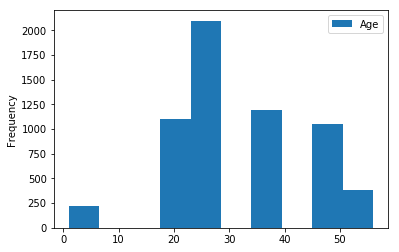

In [11]:
users.plot(kind='hist', y='Age')
plt.show()

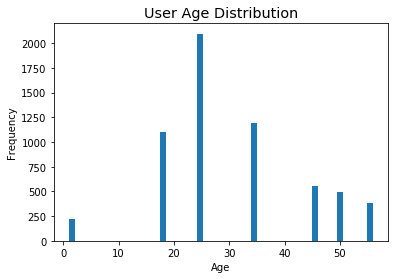

In [12]:
# Visualize age distribution of users
users.Age.plot.hist(bins=50)
plt.style.use('ggplot')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.show()

# •Visualize overall rating by users

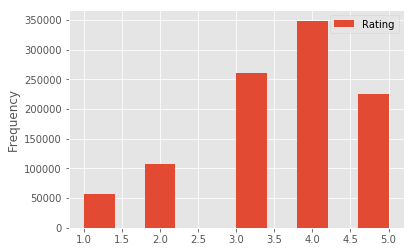

In [13]:
ratings.plot(kind='hist', y='Rating')
plt.show()

# •Find and visualize the user rating of the movie “Toy Story”

In [14]:
ToyStory = ratings[ratings["MovieID"] == 1]
ToyStory.head(10)

,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
469,6,1,4,978237008
581,8,1,4,978233496
711,9,1,5,978225952
837,10,1,5,978226474
1966,18,1,4,978154768
2276,19,1,5,978555994
2530,21,1,3,978139347
2870,23,1,4,978463614
3405,26,1,3,978130703


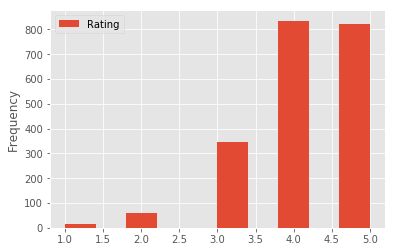

In [15]:
ToyStory.plot(kind='hist', y='Rating')
plt.show()

# •Find and visualize the viewership of the movie “Toy Story” by age group

In [16]:
merge1 = pd.merge(ToyStory, users, on = 'UserID')
merge1.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1,5,978824268,F,1,10,48067
1,6,1,4,978237008,F,50,9,55117
2,8,1,4,978233496,M,25,12,11413
3,9,1,5,978225952,M,25,17,61614
4,10,1,5,978226474,F,35,1,95370


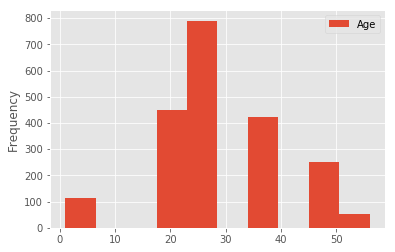

In [17]:
merge1.plot(kind='hist', y='Age')
plt.show()

# •Find and visualize the top 25 movies by viewership rating

In [18]:
merge2 = pd.merge(movies, ratings, on = 'MovieID')
merge2.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [19]:
Top25 = merge2["MovieID"].value_counts().head(25)

In [20]:
Top25 = pd.DataFrame(Top25, columns=['MovieID'])

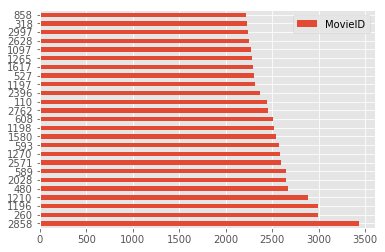

In [21]:
Top25.plot(kind='barh')

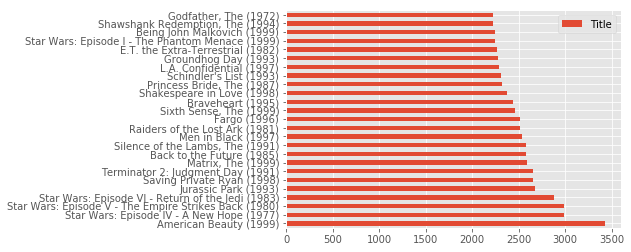

In [22]:
Top = merge2["Title"].value_counts().head(25)
Top = pd.DataFrame(Top, columns=['Title'])
Top.plot(kind='barh')

# •Find the rating for a particular user of user id = 2696

In [23]:
merge3 = pd.merge(ratings, users, on = 'UserID')

In [24]:
User_2696 = merge3[merge3["UserID"] == 2696]

In [25]:
User_2696

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
440667,2696,1258,4,973308710,M,25,7,24210
440668,2696,1270,2,973308676,M,25,7,24210
440669,2696,1617,4,973308842,M,25,7,24210
440670,2696,1625,4,973308842,M,25,7,24210
440671,2696,1644,2,973308920,M,25,7,24210
440672,2696,1645,4,973308904,M,25,7,24210
440673,2696,1805,4,973308886,M,25,7,24210
440674,2696,1892,4,973308904,M,25,7,24210
440675,2696,800,5,973308842,M,25,7,24210
440676,2696,2338,2,973308920,M,25,7,24210


# Visualize the rating data by user of user id = 2696

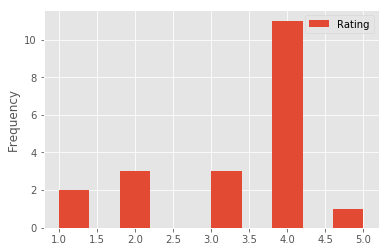

In [26]:
User_2696.plot(kind='hist', y='Rating')

# Feature Engineering

# Find out all the unique genres

In [27]:
movies.Genres.head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: Genres, dtype: object

In [28]:
genres = []
for i in movies["Genres"]:
    temp=i.split("|")
    genres.extend(temp)
unique_genres=list(set(genres))
print(unique_genres)
print(len(unique_genres))

['Musical', 'Mystery', 'Western', 'Horror', 'Fantasy', "Children's", 'Thriller', 'Drama', 'Action', 'Crime', 'Documentary', 'Animation', 'Adventure', 'Romance', 'Sci-Fi', 'Film-Noir', 'Comedy', 'War']
18


# Genre category with a one-hot encoding

# First Way

In [29]:
unique_genres=pd.Series(unique_genres)
unique_genres

0         Musical
1         Mystery
2         Western
3          Horror
4         Fantasy
5      Children's
6        Thriller
7           Drama
8          Action
9           Crime
10    Documentary
11      Animation
12      Adventure
13        Romance
14         Sci-Fi
15      Film-Noir
16         Comedy
17            War
dtype: object

In [30]:
movies.Genres = movies.Genres.str.split("|")
movies.Genres[:3]

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
Name: Genres, dtype: object

In [31]:
df = pd.DataFrame()
for row in movies.Genres:
    a= unique_genres.isin(row)
    df= df.append(a,ignore_index=True)
df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
df.columns=unique_genres
df.head()

,Musical,Mystery,Western,Horror,Fantasy,Children's,Thriller,Drama,Action,Crime,Documentary,Animation,Adventure,Romance,Sci-Fi,Film-Noir,Comedy,War
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
movies = pd.concat((movies ,df),axis=1)
movies.head()

,MovieID,Title,Genres,Musical,Mystery,Western,Horror,Fantasy,Children's,Thriller,...,Action,Crime,Documentary,Animation,Adventure,Romance,Sci-Fi,Film-Noir,Comedy,War
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,Father of the Bride Part II (1995),[Comedy],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Second Way

In [34]:
unique_genres

0         Musical
1         Mystery
2         Western
3          Horror
4         Fantasy
5      Children's
6        Thriller
7           Drama
8          Action
9           Crime
10    Documentary
11      Animation
12      Adventure
13        Romance
14         Sci-Fi
15      Film-Noir
16         Comedy
17            War
dtype: object

In [35]:
movies = pd.read_csv('movies.dat', sep='::', header=None, names =['MovieID','Title','Genres'])
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [36]:
for i in unique_genres:
    movies[i] = movies["Genres"].str.contains(i)*1
movies.head()

,MovieID,Title,Genres,Musical,Mystery,Western,Horror,Fantasy,Children's,Thriller,...,Action,Crime,Documentary,Animation,Adventure,Romance,Sci-Fi,Film-Noir,Comedy,War
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Features affecting the ratings of any particular movie

In [37]:
features = merge3.drop(['UserID','MovieID','Timestamp','Zip-code'], axis=1)
features = features[['Age', 'Occupation', 'Rating']]
features.head()

,Age,Occupation,Rating
0,1,10,5
1,1,10,3
2,1,10,3
3,1,10,4
4,1,10,5


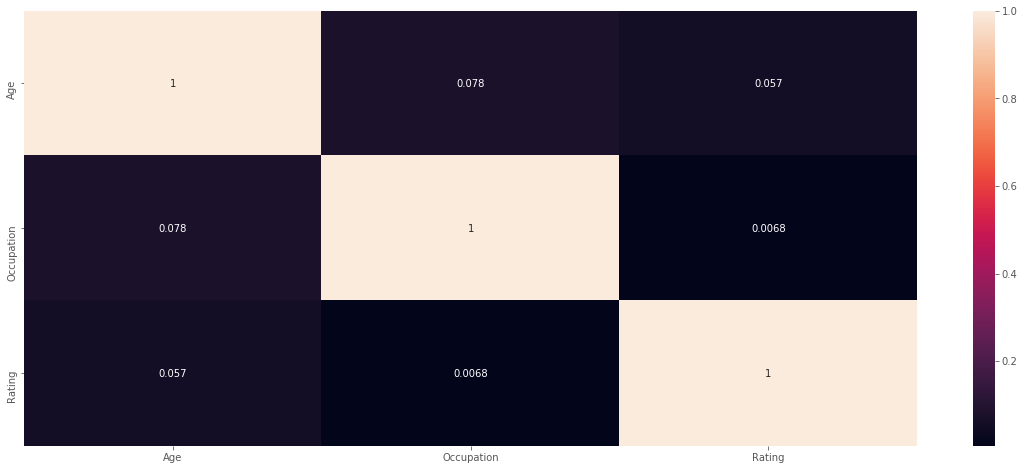

In [38]:
plt.figure(figsize=(20,8))
corr=features.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)

# Model to predict the movie ratings

In [39]:
merge3.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [40]:
features = merge3.iloc[0:1000,5:7].values
label = merge3.iloc[0:1000,2].values
features[0:2]

array([[ 1, 10],
       [ 1, 10]], dtype=int64)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = .3, random_state=3)

In [42]:
from sklearn.svm import SVC
from sklearn import metrics

In [43]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
model.score(X_test, y_test)

0.38333333333333336

In [45]:
preds = model.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,4,5
Actual,,
1,5,0
2,18,2
3,66,17
4,85,25
5,52,30


In [46]:
model.predict([[1,10]])

array([4], dtype=int64)